# I-HANK model

Variables\
A_hh: Houshold assets deflated with PNT \
A: Houshold assets nominal\
E_hh: Houshold expenditure deflated with PNT \
E: Nominal Houshold expenditure

Parameters follow notation from I-HANK docunemtation.\
New parameters are followed by _



In [ ]:
%load_ext autoreload
%autoreload 2

import numpy as npc

import matplotlib.pyplot as plt   
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

from IHANKModel import IHANKModelClass
import func 

In [ ]:
model = IHANKModelClass(name='baseline')
model.find_ss(do_print=True)
func.plot_policy(model, ['a', 'e', 'ct', 'cnt', 'cth', 'ctf'])

In [ ]:
# Expenditure on tradable and non-tradable goods as a function of total expenditure
a_ = model.ss.a[0,3,:]*model.ss.PNT
e_ = model.ss.e[0,3,:]*model.ss.PNT
ect_ = model.ss.ct[0,3,:]*model.ss.PT
ecnt_ = model.ss.cnt[0,3,:]*model.ss.PNT
share_ = ect_/(ecnt_+ect_)

plt.figure()
plt.plot(e_,share_)
plt.xlabel('Total expenditure')
plt.ylabel('Expenditure share tradable goods')
plt.title('Non-homothetic expenditure shares')

In [ ]:
model.test_hh_path()

In [ ]:
model.test_ss()

In [ ]:


model.solve_hh_ss()
model.simulate_hh_ss()

In [ ]:
model.ss.CNT_hh - 0.3973666

In [ ]:

model.ss.E_hh*model.ss.PNT-model.ss.CT_hh*model.ss.PT-model.ss.CNT_hh*model.ss.PNT

In [ ]:
# model.ss.CNT = 0.20285137772435485
# In block  [0.3973666]

# assert model.ss.CNT_hh == 0.3973666
print(f'{model.ss.CNT_hh-0.3973666:.16f}')

Everyting before HH post is steady state, so all inpust to the HH problem are steady state values, so the outputs from the HH block should be correct... 

In [ ]:
model.test_path()

# cnt = (ex-ct*pt ) / pnt


In [ ]:
model.compute_jacs()

In [ ]:
model.test_jacs()

In [ ]:
fixed = model.copy()
fixed.par.float = False
fixed.find_ss()

In [ ]:
fixed.test_ss()

In [ ]:
fixed.test_path()

In [ ]:
fixed.compute_jacs()

In [ ]:
fixed.test_jacs()

In [ ]:

# fixed.par.jump_fixed = -0.0075 # initial jump
# fixed.par.rho_fixed = 0.80 # AR(1) coefficeint

# fixed.par.jump_rF = -0.00005 # initial jump
# fixed.par.rho_rF = 0.80 # AR(1) coefficeint

fixed.par.jump_PF_s = -0.03 # initial jump
fixed.par.rho_PF_s = 0.80 # AR(1) coefficeint

fixed.find_transition_path(shocks=['PF_s'],do_print=False,do_end_check=False)

In [ ]:
lvl_path = ['Walras', 'CB', 'i']
path = ['i', 'E', ]
path_hh = ['CNT_hh', 'CT_hh', 'CTF_hh']

fixed.show_IRFs(varnames=model.varlist, lvl_value= lvl_path, do_shocks=False)

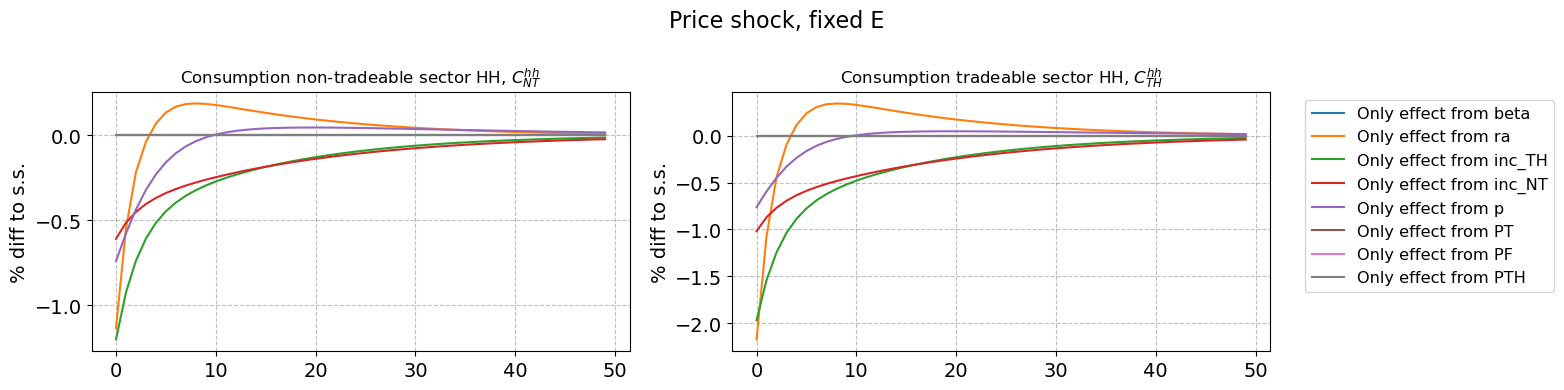

In [29]:
models = {'fixed': fixed}

model_titles = {
    'fixed': 'Price shock, fixed E'
}

for model_name, model in models.items():

    T_max = 50

    fig, (ax_C_NT, ax_C_TH) = plt.subplots(1, 2, figsize=(16, 4), dpi=100)
    fig.suptitle(f'{model_titles[model_name]}', fontsize=16)

    ax_C_NT.set_title('Consumption non-tradeable sector HH, $C_{NT}^{hh}$', fontsize=12)
    ax_C_TH.set_title('Consumption tradeable sector HH, $C_{TH}^{hh}$', fontsize=12)

    i_color = 0

    for use_inputs in [[x] for x in model.inputs_hh]:

        # a. compute
        path_alt = model.decompose_hh_path(do_print=False, use_inputs=use_inputs)

        # b. plot
        if use_inputs is None:
            label = 'No inputs'
            ls = '--'
            color = 'black'
        elif use_inputs == 'all':
            label = 'All inputs'
            ls = '-'
            color = 'black'
        else:
            label = f'Only effect from {use_inputs[0]}'
            ls = '-'
            color = f'C{i_color}' # use color index directly
            i_color += 1

        ax_C_NT.plot((path_alt.CT_hh[:T_max] / model.ss.CT_hh - 1) * 100, ls=ls, color=color, label=label)
        ax_C_TH.plot((path_alt.CNT_hh[:T_max] / model.ss.CNT_hh - 1) * 100, ls=ls, color=color, label=label)

    for ax in [ax_C_NT, ax_C_TH]:
        ax.set_ylabel('% diff to s.s.')
        lgd = ax_C_TH.legend(frameon=True, ncol=1, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()


In [ ]:
hh_var = ['ra','inc_TH', 'inc_NT', 'p']